In [1]:
import numpy as np
import pymc as mc
import seaborn


In [18]:
bkg = 4
cts = 20

realbkg = mc.Uniform('bkg', 1, 1000)
obsbkg = mc.Poisson('obsbkg', realbkg, observed=True, value=bkg)

realcts = mc.Uniform('cts', 0, 1000)
obscts = mc.Poisson('obscts', realbkg + realcts, observed=True, value=cts)

model = mc.MCMC((realbkg, obsbkg, realcts, obscts))
map = mc.MAP(model)
map.fit()

 [-----------------100%-----------------] 40000 of 40000 complete in 3.9 secPlotting bkg
Plotting cts


/Users/balarsen/miniconda3/envs/python3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)



bkg:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	5.022            2.199            0.039            [ 1.234  9.279]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	1.691            3.436           4.682          6.238         10.249
	

cts:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	15.891           5.111            0.094          [  6.715  26.781]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	6.727            12.284          15.628         19.055        26.836
	
None


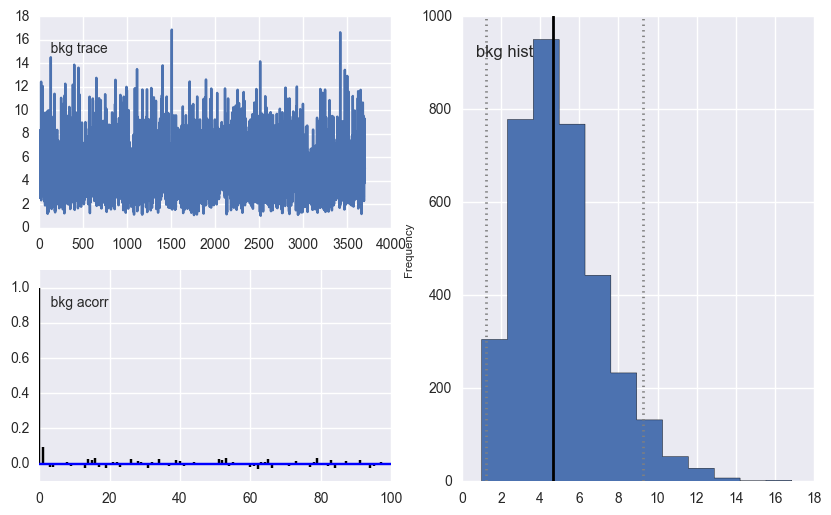

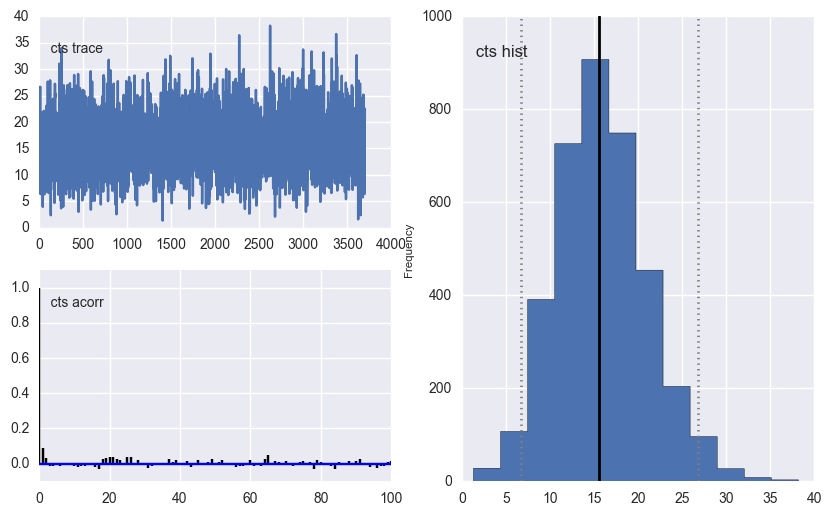

In [19]:
model.sample(40000, burn=3000, thin=10)
mc.Matplot.plot(model)
print(model.summary())

In [22]:
bkg = 4
cts = 20

realbkg = mc.Uniform('bkg', 1, 1000)
obsbkg = mc.Poisson('obsbkg', realbkg, observed=True, value=bkg)

realcts = mc.Uniform('cts', 0, 1000)

@mc.stochastic
def obscts(realbkg=realbkg, realcts=realcts, observed=True, value=cts):
    return mc.Poisson('b1', realbkg) + mc.Poisson('b2', realcts)


model = mc.MCMC((realbkg, obsbkg, realcts, obscts))
map = mc.MAP(model)
map.fit()

In [ ]:
model.sample(40000, burn=3000, thin=10)
mc.Matplot.plot(model)
print(model.summary())

 [-----------------54%                  ] 21971 of 40000 complete in 40.1 sec